In [25]:
# Panda for reading in csv file
import pandas as pd
# plt for plotting graphs
import matplotlib.pyplot as plt
# Linear regression models
from sklearn.linear_model import LinearRegression
# Neighbour regressor model
from sklearn.neighbors import KNeighborsRegressor
# Bayesian Ridge Model
from sklearn.linear_model import BayesianRidge
# Neural Network model
from sklearn.neural_network import MLPRegressor
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
# function for splitting training and testing data
from sklearn.model_selection import train_test_split
# error scores to compare different regression algorithms
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [26]:
# Setup DataFrame
df = pd.read_csv('data/DataEnergyClean.csv')

In [27]:
# Setting up our X for the multidimensional input
X = df.drop(columns='Appliances')
# Setting up the value we want to predict (Appliances, energy use in Wh)
y = df['Appliances']

# Setup the training data (X_train, y_train) which will use 80% of the dataset, 
# and the test data (X_test, y_test) which will use the remaining 20% of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# List of regression models to apply to dataset
models = {"Linear\n Regression": LinearRegression(n_jobs=-1),
          "Optimized\n Linear\n Regression": LinearRegression(n_jobs=-1, copy_X=True, fit_intercept=False, positive=False),
          "K-Nearest\n Neighbors": KNeighborsRegressor(n_jobs=-1, algorithm='auto', leaf_size=30, n_neighbors=5, p=2, weights='uniform'),
          "Optimized\n K-Nearest\n Neighbors": KNeighborsRegressor(n_jobs=-1, algorithm='auto', leaf_size=15, n_neighbors=5, p=1, weights='distance'),
          "Neural Net": MLPRegressor(),
          "Optimized\n Neural Net": MLPRegressor(activation='relu', alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 64), learning_rate_init=0.001, solver='adam'),
          "Bayesian\n Ridge ": BayesianRidge(),
          "Optimized\n Bayesian\n Ridge": BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-08, lambda_2=1e-06, max_iter=100),
          "Decision Tree\n Regressor": DecisionTreeRegressor(),
          "Optimized\n Decision Tree\n Regressor": DecisionTreeRegressor(criterion="poisson",max_depth=10,min_samples_split=10,random_state=2),
}


In [29]:
# Checking each model
model_mse_score = []
model_mae_score = []
model_r2_score = []

for model in models:
    print(f"Executing {model}...")

    models[model].fit(X_train, y_train)
    y_pred = models[model].predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_mse_score.append(mse)
    model_mae_score.append(mae)
    model_r2_score.append(r2)

Executing Linear
 Regression...
Executing Optimized
 Linear
 Regression...
Executing K-Nearest
 Neighbors...
Executing Optimized
 K-Nearest
 Neighbors...
Executing Neural Net...
Executing Optimized
 Neural Net...
Executing Bayesian
 Ridge ...
Executing Optimized
 Bayesian
 Ridge...
Executing Decision Tree
 Regressor...
Executing Optimized
 Decision Tree
 Regressor...


In [30]:
# Print out numerical values of results
i = 0
for key in models:
    print(f"==== {key} ====\nMSE: {model_mse_score[i]}\nMAE: {model_mae_score[i]}\nR2: {model_r2_score[i]}")
    i += 1

==== Linear
 Regression ====
MSE: 8318.156546947192
MAE: 52.56209025182259
R2: 0.16877377563969265
==== Optimized
 Linear
 Regression ====
MSE: 8317.395226863873
MAE: 52.59174412606296
R2: 0.16884985370035588
==== K-Nearest
 Neighbors ====
MSE: 5963.199391943248
MAE: 36.730174816316186
R2: 0.4041026172449438
==== Optimized
 K-Nearest
 Neighbors ====
MSE: 4295.136046138678
MAE: 30.04709313433644
R2: 0.5707907517013484
==== Neural Net ====
MSE: 8340.744480103596
MAE: 52.652878412827405
R2: 0.16651658292064087
==== Optimized
 Neural Net ====
MSE: 8156.006573765185
MAE: 45.517371574275096
R2: 0.18497728289848192
==== Bayesian
 Ridge  ====
MSE: 8317.472515222795
MAE: 52.53655013230312
R2: 0.16884213034117046
==== Optimized
 Bayesian
 Ridge ====
MSE: 8317.47251524541
MAE: 52.5365501341646
R2: 0.1688421303389105
==== Decision Tree
 Regressor ====
MSE: 8698.50519381809
MAE: 39.81251583481125
R2: 0.13076586272116497
==== Optimized
 Decision Tree
 Regressor ====
MSE: 7707.198947192669
MAE: 43.52

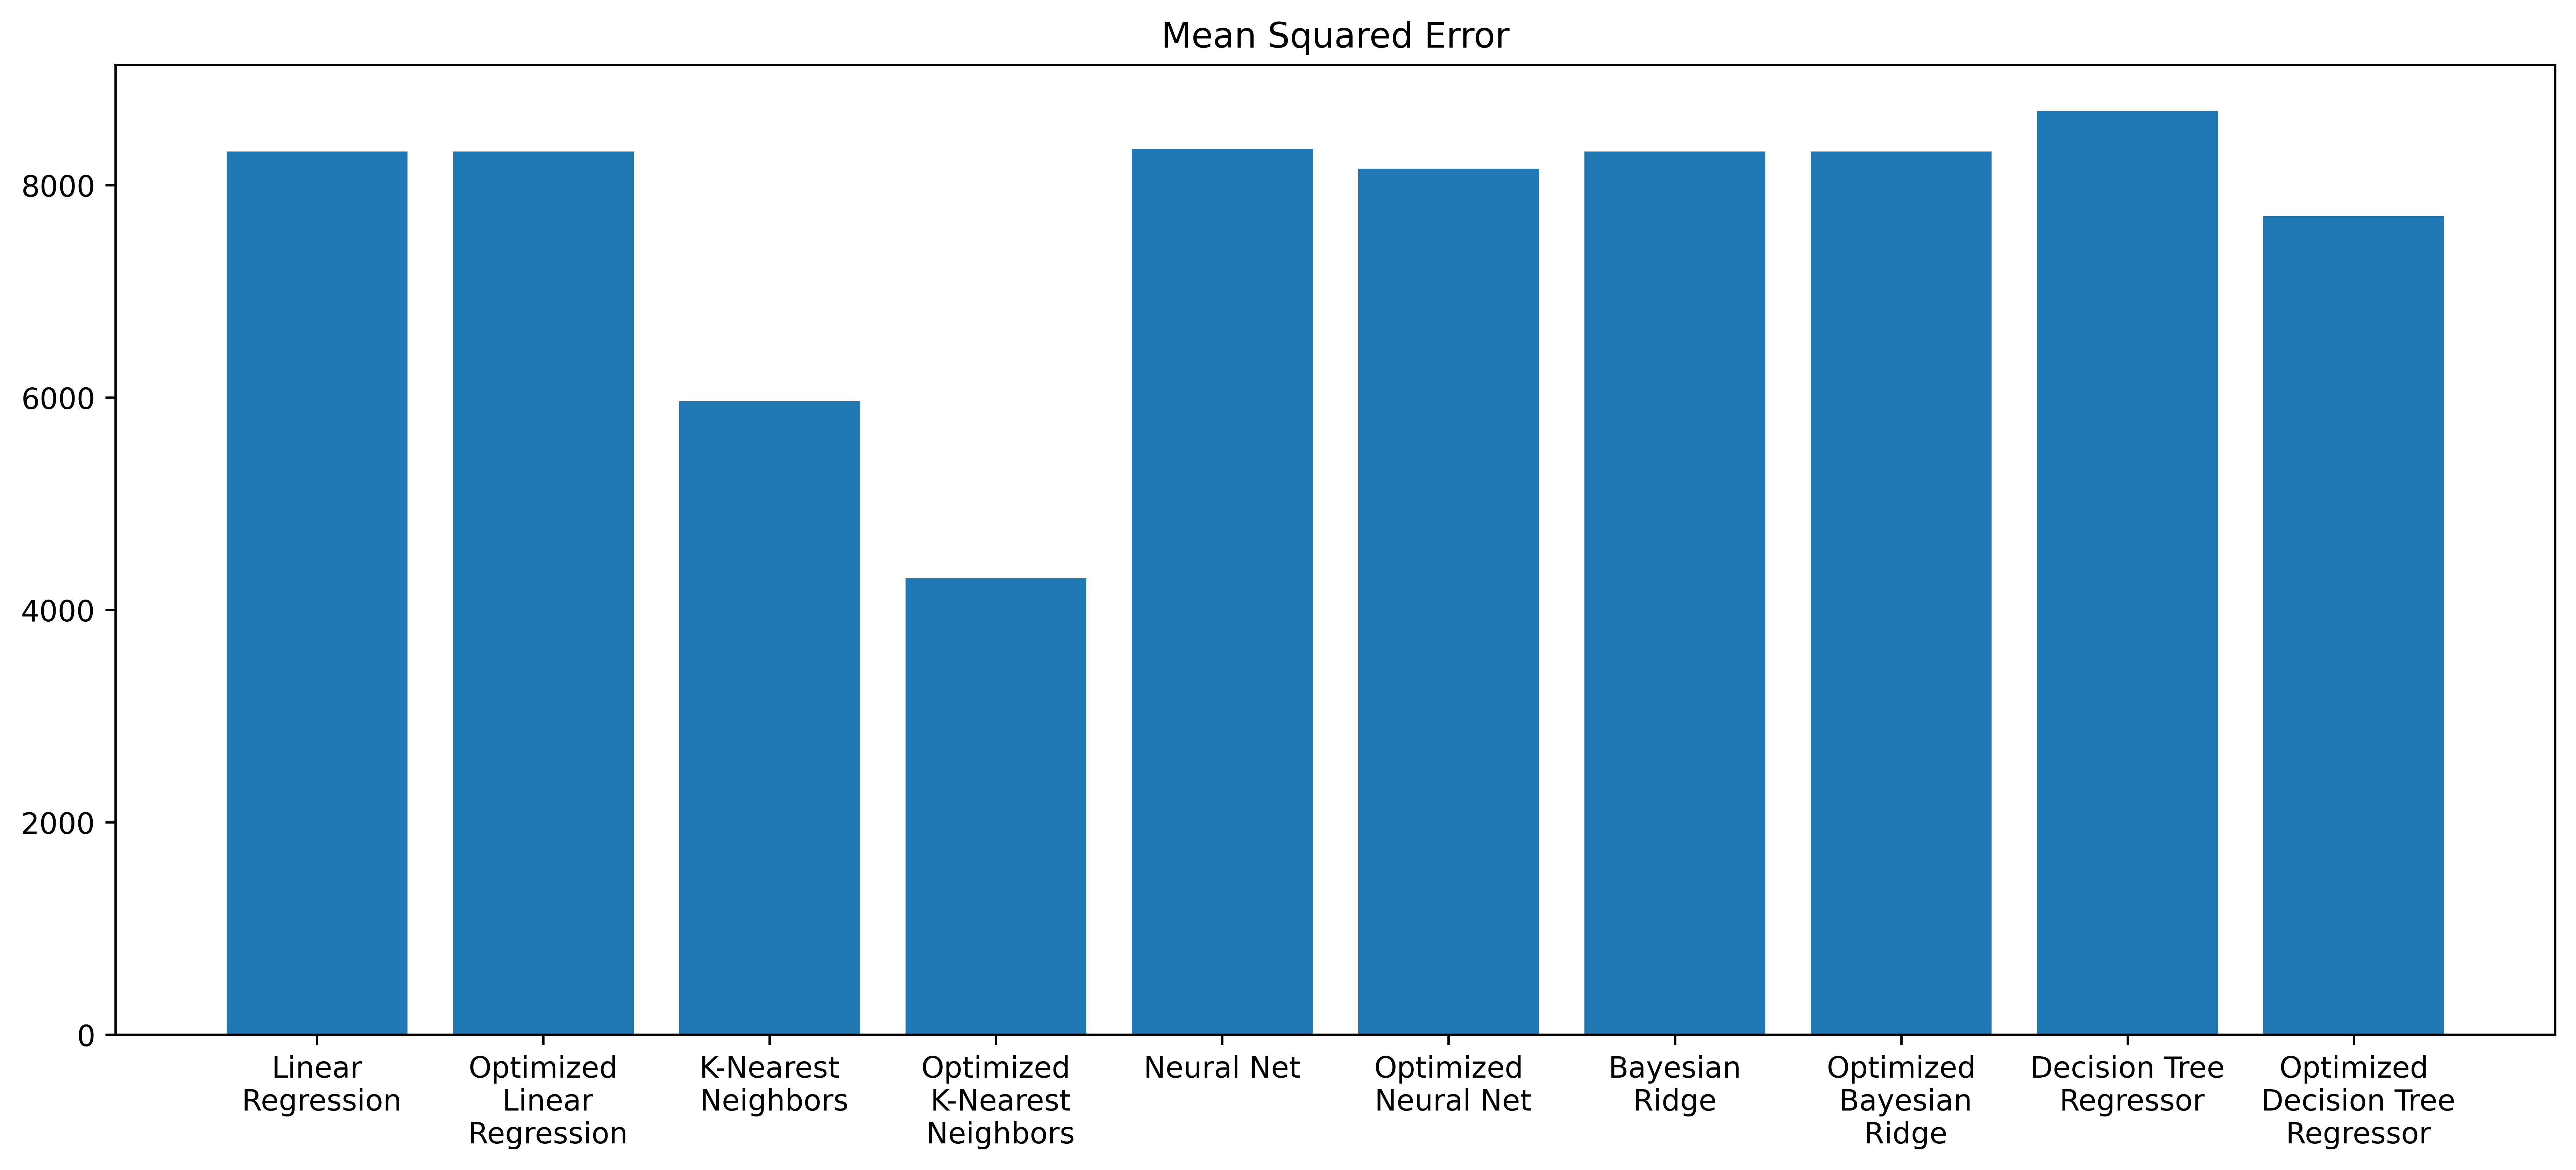

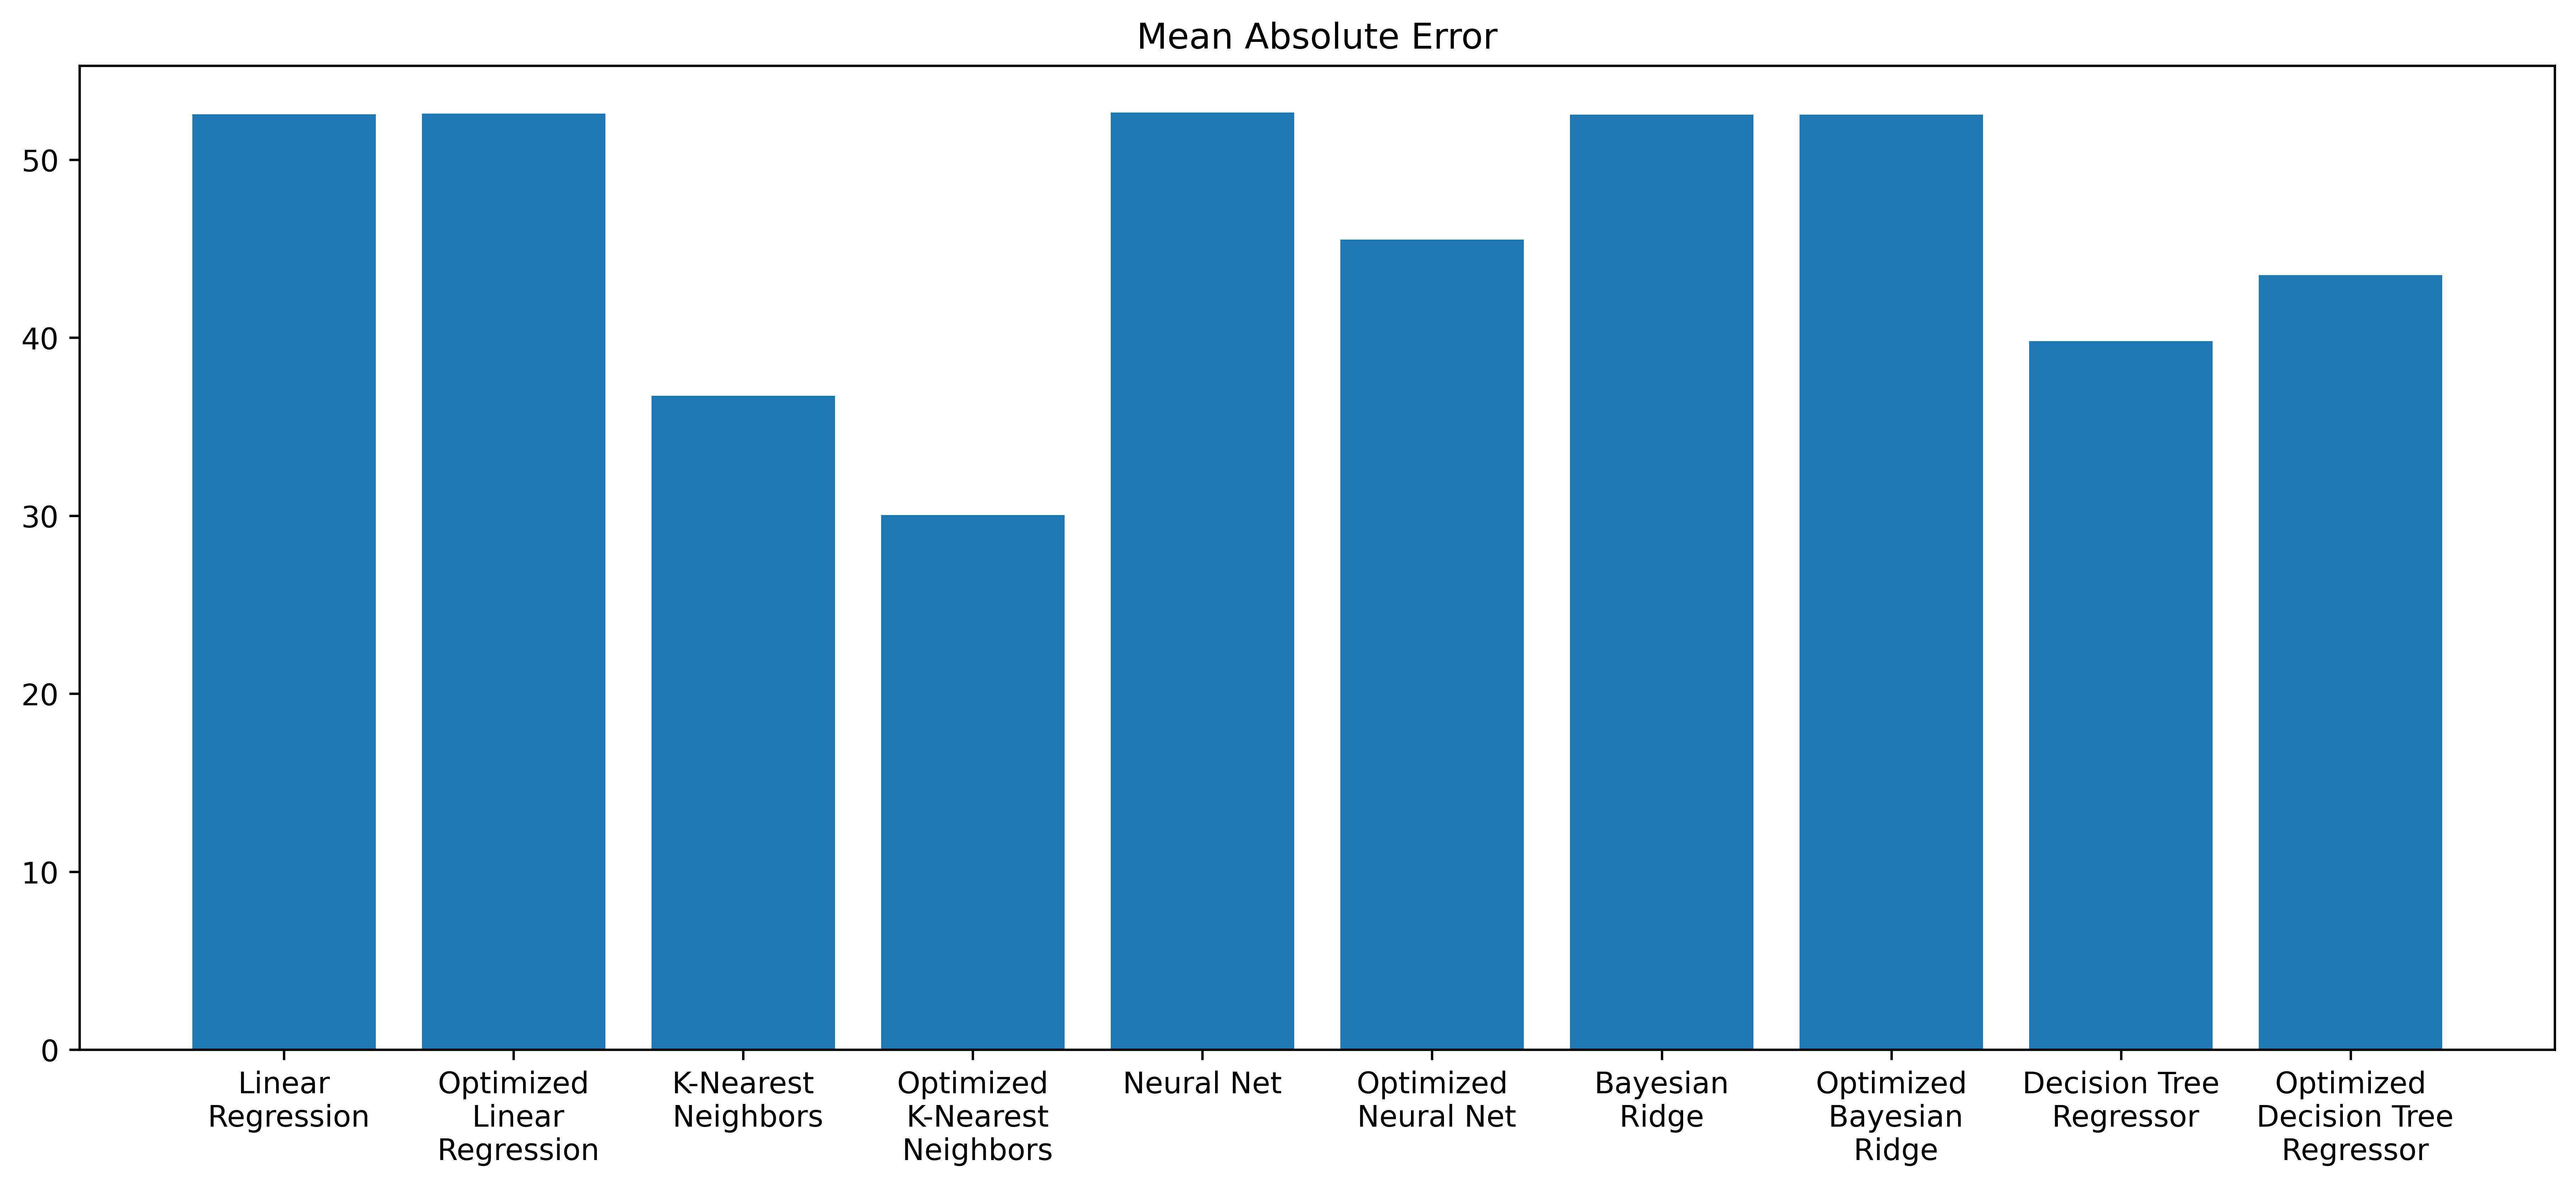

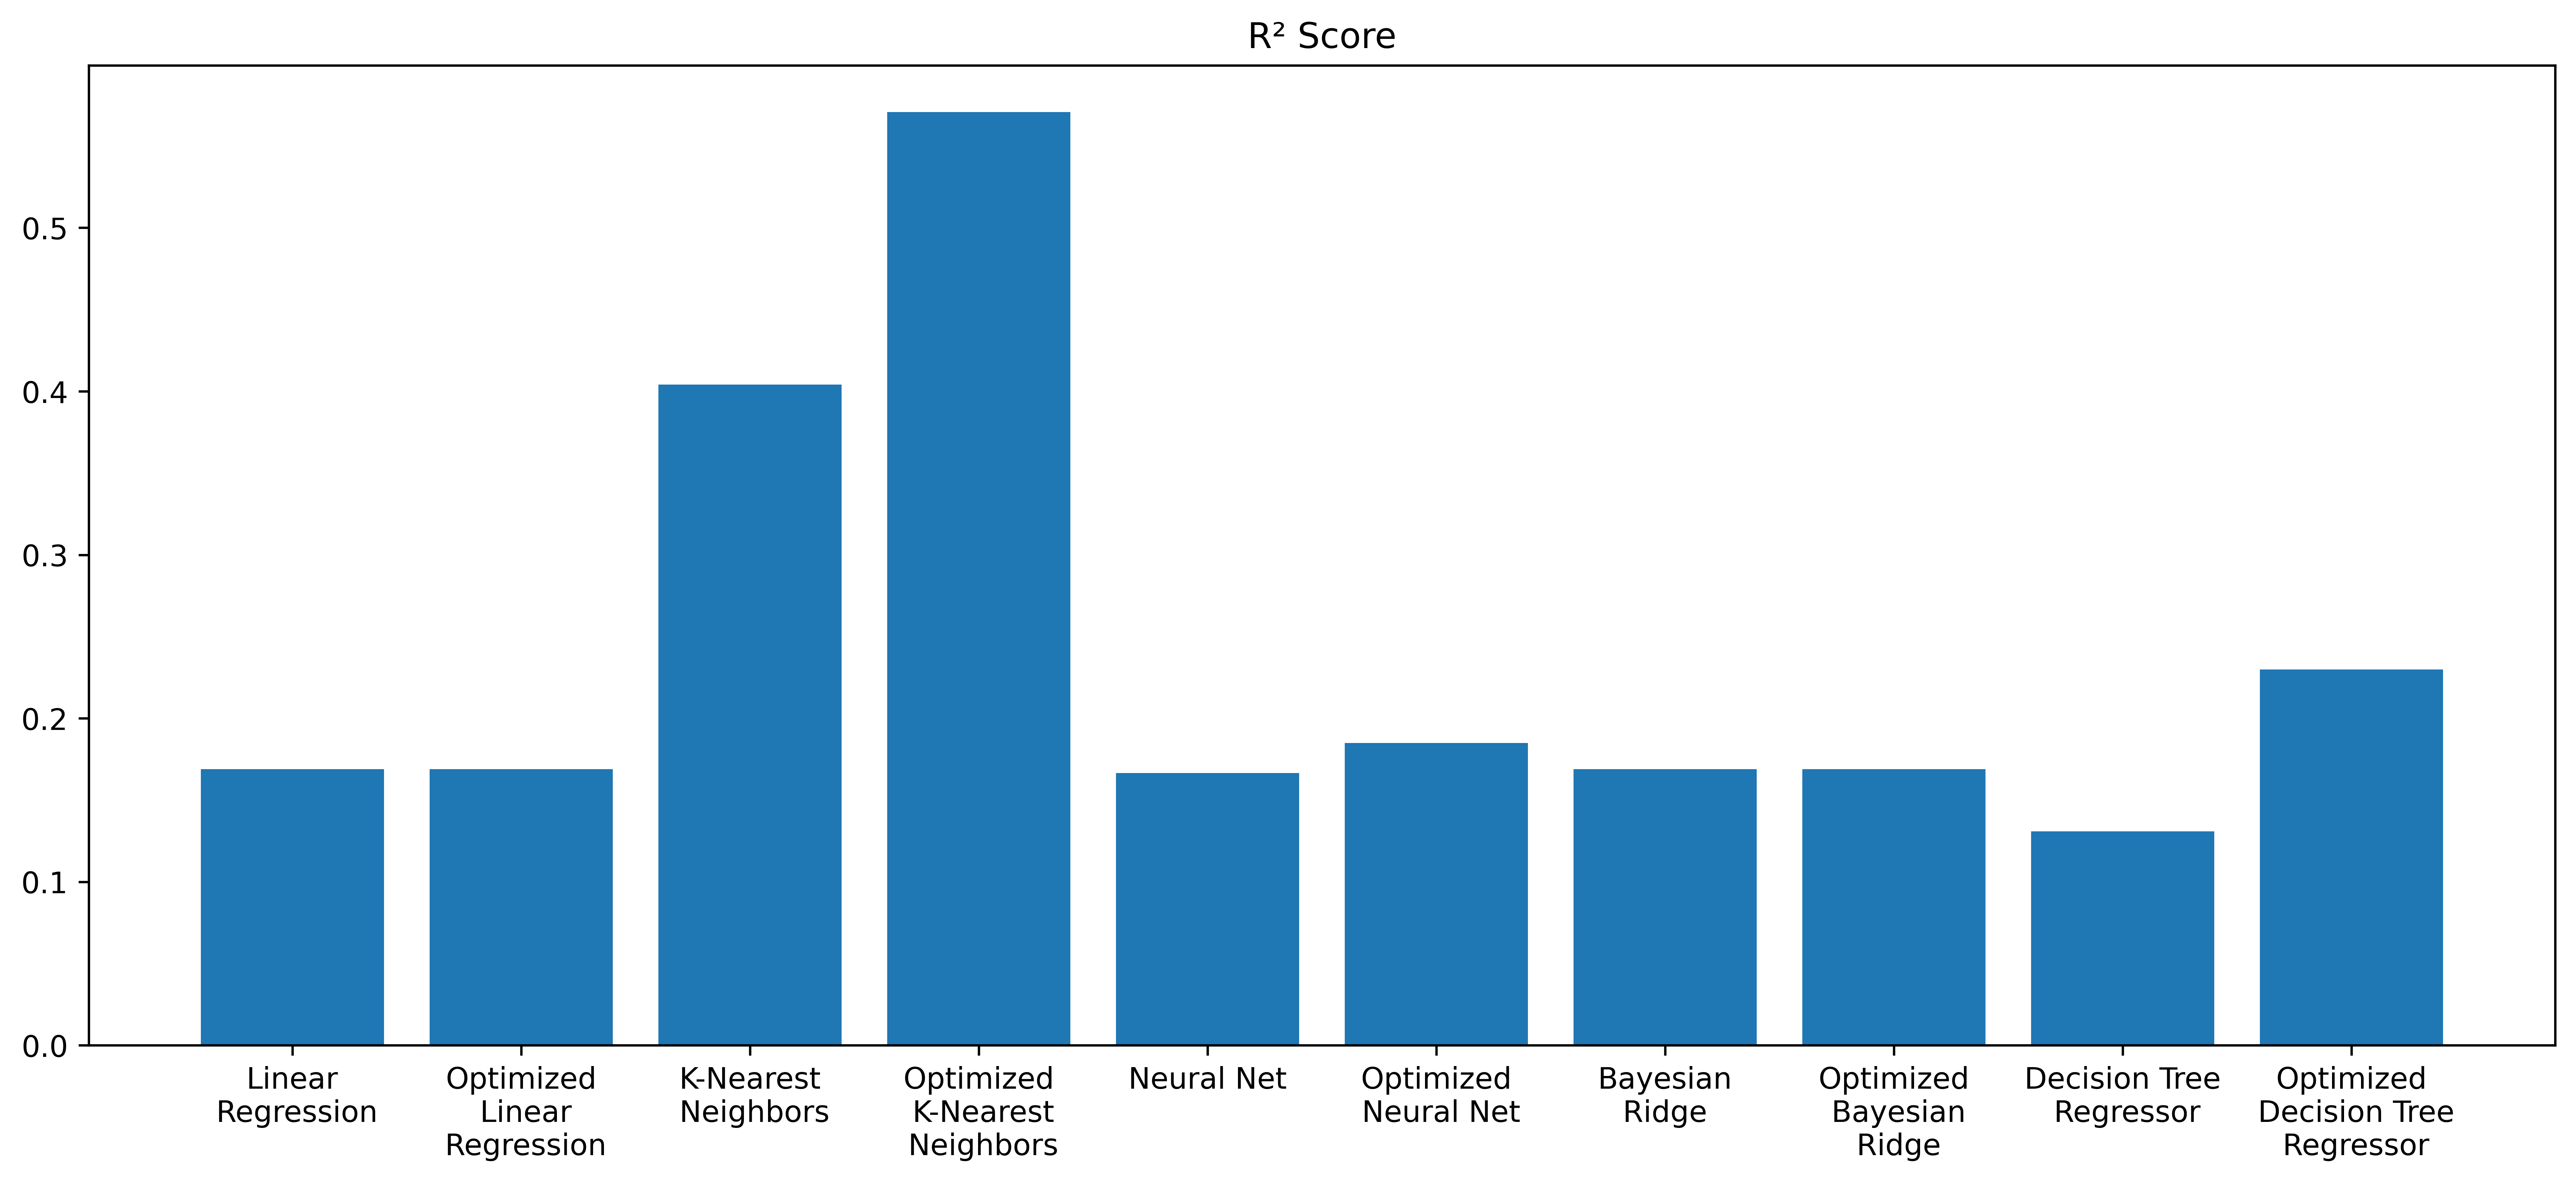

In [31]:
# Show how models measure up against each other
fig1, ax1 = plt.subplots(figsize=(15, 6), dpi=600)
ax1.bar(models.keys(), model_mse_score)
ax1.set_title('Mean Squared Error')
plt.show()

fig2, ax2 = plt.subplots(figsize=(15, 6), dpi=600)
ax2.bar(models.keys(), model_mae_score)
ax2.set_title('Mean Absolute Error')
plt.show()

fig3, ax3 = plt.subplots(figsize=(15, 6), dpi=600)
ax3.bar(models.keys(), model_r2_score)
ax3.set_title('R² Score')
plt.show()